In [ ]:
# ADVANCED SEABORN CHALLENGE 
# =============================================================================
# This code creates an executive dashboard using CSV files from the week 9 Workshop:
# - customers.csv (100 customers)
# - products.csv (60 products) 
# - sales.csv (150 transactions)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# =============================================================================
# DATA LOADING AND PREPARATION
# =============================================================================
# STEP 1: Load your data
# Always start by loading your CSV files and checking what you have
# Tip: Use len() to see how many rows you have in each dataset

print("📊 Loading workshop data...")

# TODO: Load the three CSV files using pd.read_csv()

customers = pd.read_csv('customers_wk9_thurs.csv')
products = pd.read_csv('products_wk9_thurs.csv')
sales = pd.read_csv('sales_wk9_thurs.csv')

print(f"✅ Data loaded successfully:")
print(f"   - {len(customers)} customers")
print(f"   - {len(products)} products") 
print(f"   - {len(sales)} sales transactions")


📊 Loading workshop data...
✅ Data loaded successfully:
   - 100 customers
   - 60 products
   - 150 sales transactions


In [3]:
# STEP 2: Prepare date columns for analysis
# Convert string dates to datetime objects so we can extract day names, months, etc.
# Pandas to_datetime() function is your friend here!
customers['registration_date'] = pd.to_datetime(customers['registration_date'])
products['launch_date'] = pd.to_datetime(products['launch_date'])
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])


In [4]:
# STEP 3: Extract useful information from dates
# We want to analyze patterns by day of the week, so extract day names
# Hint: Use .dt.day_name() to get 'Monday', 'Tuesday', etc.
sales['year'] = sales['transaction_date'].dt.year
sales['month'] = sales['transaction_date'].dt.month
sales['day_of_week'] = sales['transaction_date'].dt.dayofweek
sales['day_name'] = sales['transaction_date'].dt.day_name()

In [6]:
# Chart 1 Data: Revenue by product category
# We need to combine sales data with product category information
# Use merge() to join sales with products, then group by category and sum revenue
sales_with_category = sales.merge(products[['product_id', 'category']], on='product_id')
category_revenue = sales_with_category.groupby('category')['total_amount'].sum().sort_values(ascending=False)

# Chart 2 Data: Customer count by state  
# Count how many customers are in each state
# Use value_counts() - it's perfect for counting occurrences!
state_customer_counts = customers['state'].value_counts()

# Chart 3 Data: Daily transaction patterns
# Calculate average transaction amount for each day of the week
# Define the order of days so our chart shows Monday through Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg_amount = sales.groupby('day_name')['total_amount'].mean().reindex(day_order)
# Fill any missing days with 0 (in case no transactions happened on certain days)
daily_avg_amount = daily_avg_amount.fillna(0)

# Chart 4 Data: Transaction amounts for distribution analysis
# We'll use this to create a histogram showing the spread of transaction values
transaction_amounts = sales['total_amount']

print(f"✅ Data preparation complete:")
print(f"   - {len(category_revenue)} product categories")
print(f"   - {len(state_customer_counts)} states represented")
print(f"   - Transaction range: ${transaction_amounts.min():.2f} - ${transaction_amounts.max():.2f}")

✅ Data preparation complete:
   - 5 product categories
   - 5 states represented
   - Transaction range: $12.99 - $319.98


In [9]:
# STEP 5: Set up professional styling
# Before creating charts, set a consistent style for the entire notebook
# sns.set_theme() controls the overall look of all your seaborn plots

# Choose a clean, professional style:
# - "whitegrid" gives a clean white background with subtle grid lines
# - "talk" context makes fonts and elements larger (good for presentations)
sns.set_theme(
    style="whitegrid",      # Clean white background with subtle grid lines
    context="talk"          # Larger fonts and elements for presentations
)

# Fine-tune some matplotlib settings for extra polish
# These settings make the charts look more professional
plt.rcParams.update({
    'figure.facecolor': 'white',        # White background for the entire figure
    'axes.facecolor': 'white',          # White background for each chart
    'font.family': 'DejaVu Sans',       # Professional, readable font
    'axes.spines.top': False,           # Remove top border (cleaner look)
    'axes.spines.right': False,         # Remove right border (cleaner look)
})


CHALLENGE: EXECUTIVE SUMMARY DASHBOARD
📊 Creating Executive Dashboard with actual workshop data...

📈 Workshop Data Overview:
   • Total Revenue: $13,409.03
   • Average Transaction: $89.39
   • Product Categories: 5
   • States Represented: 5


Text(0.5, 0.98, 'Executive Summary Dashboard')

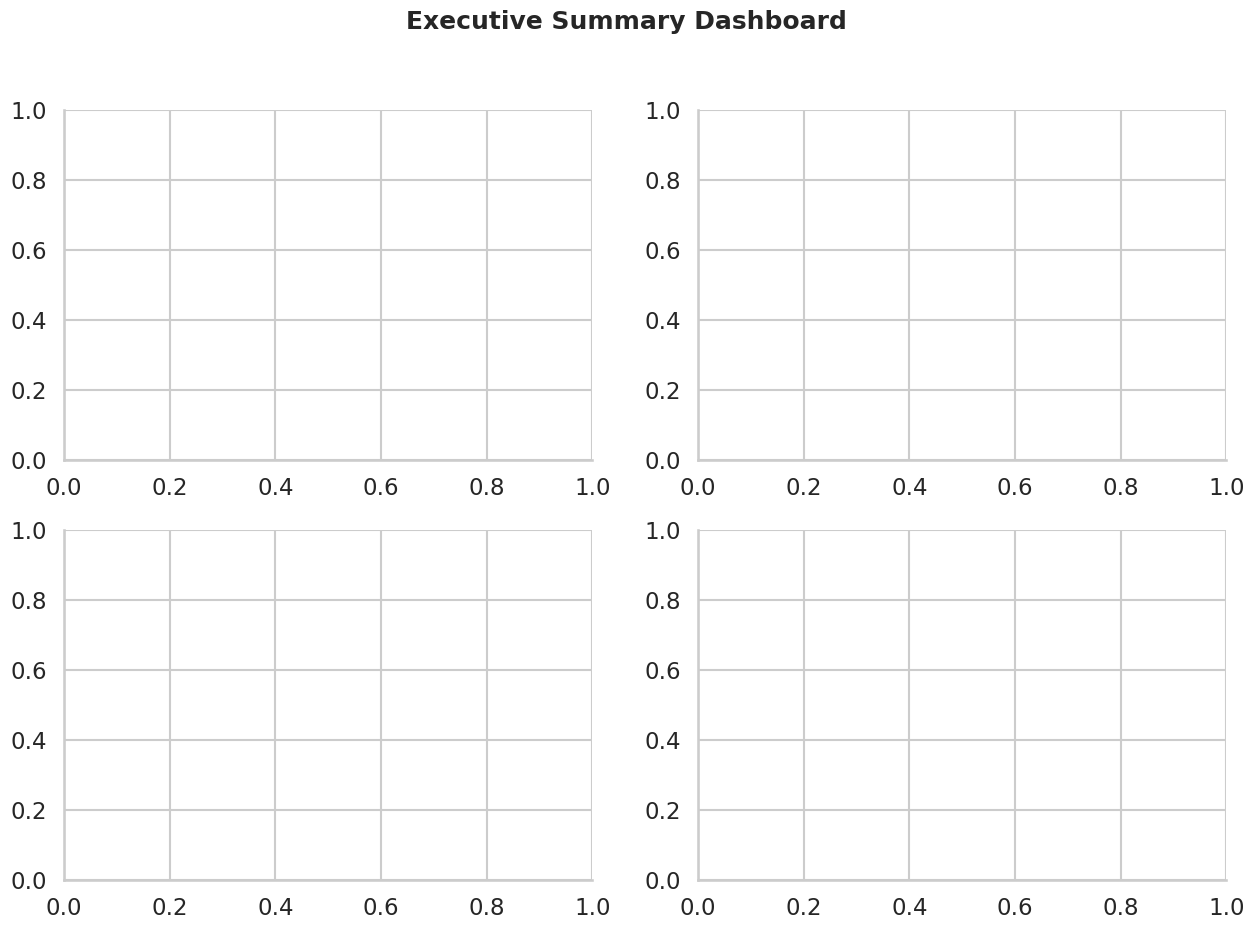

In [10]:
# GOAL: Create a professional 2x2 dashboard showing key business metrics
# 
# DASHBOARD STRUCTURE:
# [Revenue by Category]  [Customers by State]
# [Daily Patterns]       [Transaction Distribution]
#
# KEY SKILLS: subplots, multiple chart types, professional styling
# =============================================================================

print("\n" + "=" * 60)
print("CHALLENGE: EXECUTIVE SUMMARY DASHBOARD")
print("=" * 60)

print("📊 Creating Executive Dashboard with actual workshop data...")

# Display key statistics first (always good to understand your data!)
print(f"\n📈 Workshop Data Overview:")
print(f"   • Total Revenue: ${sales['total_amount'].sum():,.2f}")
print(f"   • Average Transaction: ${sales['total_amount'].mean():.2f}")
print(f"   • Product Categories: {products['category'].nunique()}")
print(f"   • States Represented: {customers['state'].nunique()}")

# STEP 1: Create the dashboard structure
# plt.subplots() creates multiple charts in one figure
# (2, 2) means 2 rows and 2 columns = 4 charts total
# figsize controls the overall size - larger numbers = bigger dashboard

# TODO: Create a 2x2 subplot structure with figsize=(15, 10)
# Hint: fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(?, ?, figsize=(?))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))


# TODO: Add a main title that spans the entire dashboard
# Hint: Use fig.suptitle() with appropriate fontsize and fontweight

fig.suptitle("Executive Summary Dashboard", fontsize=18, fontweight='bold')


In [13]:
# =============================================================================
# CHART 1 (TOP LEFT): Revenue by Product Category
# =============================================================================
# BUSINESS QUESTION: Which product categories generate the most revenue?
# CHART TYPE: Horizontal bar chart (good for comparing categories)
# 
# WHY HORIZONTAL? When category names are long, horizontal bars are easier to read
# The data is already sorted from highest to lowest revenue (we did this earlier!)

# TODO: Create a horizontal bar chart using seaborn
# Hint: sns.barplot(x=category_revenue.values, y=category_revenue.index, ax=ax1)

category_df = category_revenue.reset_index()
category_df.columns = ['category', 'revenue']

sns.barplot(
    data=category_df,
    x='revenue',
    y='category',
    hue='category',
    ax=ax1,
    legend=False
)

# TODO: Add clear, descriptive titles and labels
# Hint: Use ax1.set_title(), ax1.set_xlabel(), ax1.set_ylabel()
# Remember: Titles should answer "What am I looking at?"
# Labels should specify units (dollars, counts, etc.)

ax1.set_title("Revenue by Product Category")
ax1.set_xlabel("Total Revenue ($)")
ax1.set_ylabel("Product Category")

# =============================================================================
# CHART 2 (TOP RIGHT): Customer Count by State
# =============================================================================
# BUSINESS QUESTION: Where are most of our customers located?
# CHART TYPE: Horizontal bar chart (good for geographic comparisons)
#
# We're showing only the top 6 states to keep the chart readable
# Too many bars makes charts cluttered and hard to interpret

# TODO: Select top 6 states (data is already sorted by value_counts())
# Hint: top_states = state_customer_counts.head(?)

top_states = state_customer_counts.head(6)

# TODO: Create horizontal bar chart for state data
# Hint: sns.barplot(x=top_states.values, y=top_states.index, ax=ax2)

top_states_df = top_states.reset_index()
top_states_df.columns = ['state', 'count']

sns.barplot(
    data=top_states_df,
    x='count',
    y='state',
    hue='state',
    ax=ax2,
    legend=False
)

# TODO: Add appropriate title and labels for the state chart

ax2.set_title("Top 6 States by Customer Count")
ax2.set_xlabel("Number of Customers")
ax2.set_ylabel("State")


# =============================================================================
# CHART 3 (BOTTOM LEFT): Daily Transaction Trends  
# =============================================================================
# BUSINESS QUESTION: Do transaction amounts vary by day of the week?
# CHART TYPE: Line chart (perfect for showing trends over time/sequence)
#
# Line charts are ideal when you want to show:
# - Trends over time
# - Patterns in sequential data
# - Connections between data points

# TODO: Create a line chart with markers (dots) at each point
# Hint: ax3.plot(range(len(daily_avg_amount)), daily_avg_amount.values, marker='o', linewidth=2, markersize=6)
# range(len(daily_avg_amount)) creates x-positions: 0, 1, 2, 3, 4, 5, 6
# daily_avg_amount.values provides the y-values (average amounts)

ax3.plot(range(len(daily_avg_amount)), daily_avg_amount.values, marker='o', linewidth=2, markersize=6, color='purple')

# TODO: Add title and labels for the daily trends chart

ax3.set_title("Average Transaction Amount by Day")

# TODO: Set up the x-axis to show day names instead of numbers
# Hint: Use ax3.set_xticks() and ax3.set_xticklabels()
# You might want to rotate the labels with rotation=45 for better fit

ax3.set_xlabel("Day of Week")
ax3.set_ylabel("Avg Amount ($)")
ax3.set_xticks(range(len(daily_avg_amount)))
ax3.set_xticklabels(daily_avg_amount.index, rotation=45)

# =============================================================================
# CHART 4 (BOTTOM RIGHT): Transaction Amount Distribution
# =============================================================================
# BUSINESS QUESTION: What's the typical transaction amount? How spread out are they?
# CHART TYPE: Histogram (perfect for showing distribution of continuous data)
#
# Histograms help you understand:
# - What's the most common value?
# - How spread out is the data?
# - Are there any outliers?

# TODO: Create histogram showing distribution of transaction amounts
# Hint: sns.histplot(transaction_amounts, bins=15, ax=ax4, alpha=0.7)
# bins=15 creates 15 bins (bars) - not too few (lose detail) or too many (noisy)
# alpha=0.7 makes bars slightly transparent (looks more professional)


sns.histplot(transaction_amounts, bins=15, ax=ax4, alpha=0.7, color='coral')


# TODO: Add title and labels for the histogram

# TODO: Add a reference line showing the average (mean) transaction amount
# This helps viewers understand what's "typical"
# Hint: Calculate mean_amount = transaction_amounts.mean()
# Then use ax4.axvline() to draw a vertical line at the mean value
# Use color='red', linestyle='--', linewidth=2 for visibility
# Add a label for the legend: label=f'Mean: ${mean_amount:.2f}'

mean_amount = transaction_amounts.mean()
ax4.axvline(mean_amount, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_amount:.2f}')

# TODO: Add legend so viewers know what the red line represents
# Hint: ax4.legend()

ax4.set_title("Transaction Amount Distribution")
ax4.set_xlabel("Transaction Amount ($)")
ax4.set_ylabel("Frequency")
ax4.legend()


# =============================================================================
# STEP 7: Final Dashboard Polish
# =============================================================================
# plt.tight_layout() automatically adjusts spacing between charts
# This prevents titles and labels from overlapping - essential for multi-panel plots!

# TODO: Apply tight layout to your dashboard
# Hint: plt.tight_layout()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle

# TODO: Display the completed dashboard
# Hint: plt.show()

plt.show()


<Figure size 640x480 with 0 Axes>

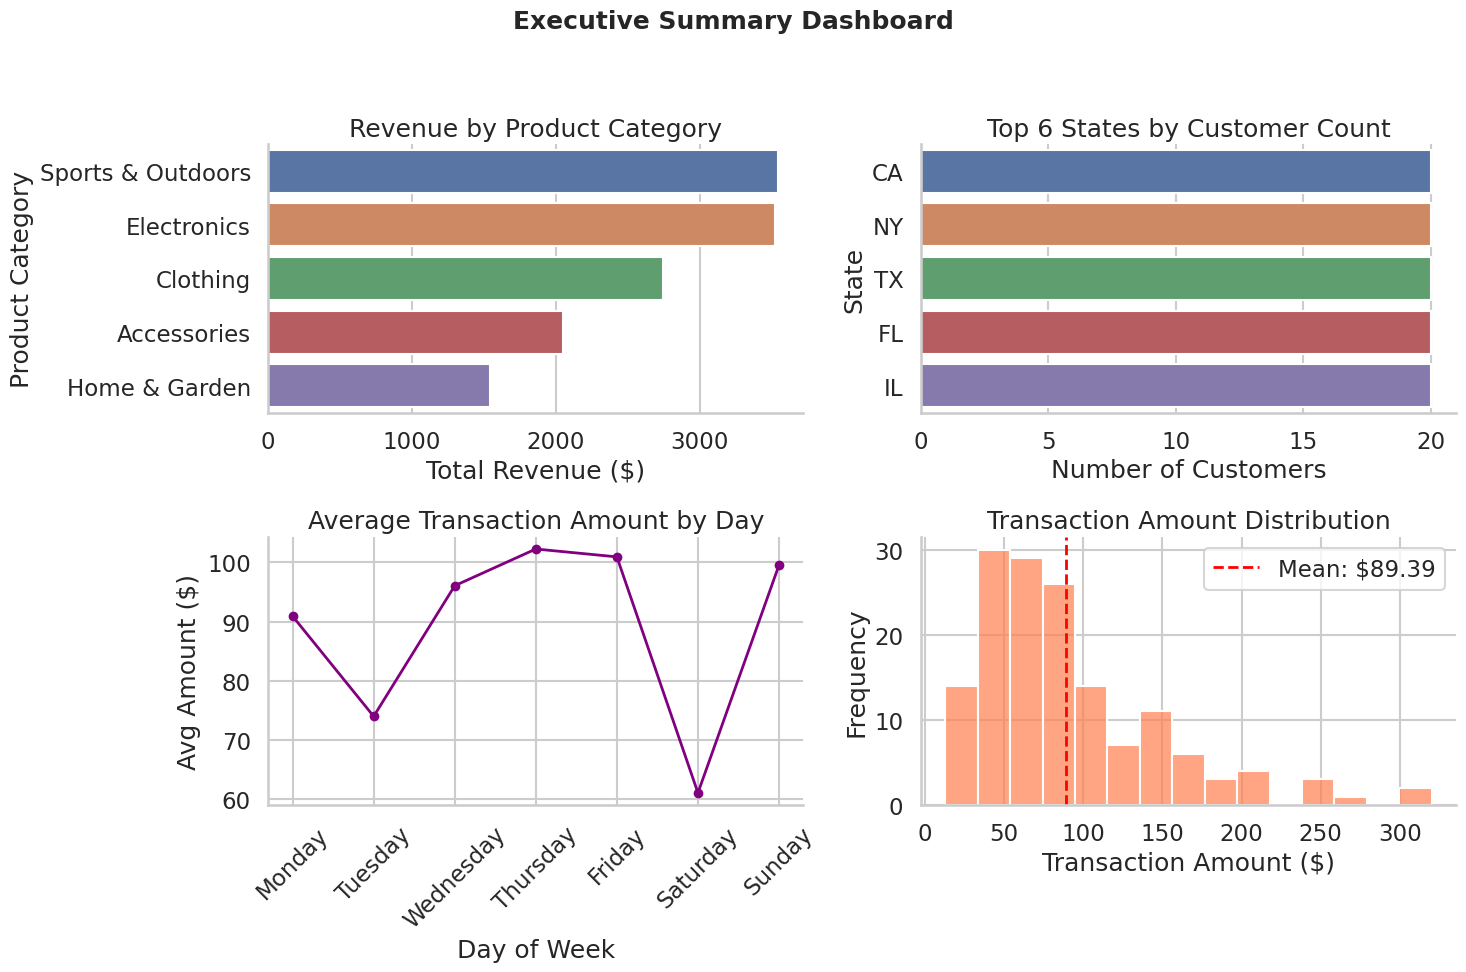

In [14]:
# Rebuild data for Chart 1 (Revenue by Category)
category_df = category_revenue.reset_index()
category_df.columns = ['category', 'revenue']

# Rebuild data for Chart 2 (Top States by Customer Count)
top_states = state_customer_counts.head(6)
top_states_df = top_states.reset_index()
top_states_df.columns = ['state', 'count']

# Create 2x2 subplot structure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Executive Summary Dashboard", fontsize=18, fontweight='bold')

# Chart 1: Revenue by Product Category
sns.barplot(
    data=category_df,
    x='revenue',
    y='category',
    hue='category',
    ax=ax1,
    legend=False
)
ax1.set_title("Revenue by Product Category")
ax1.set_xlabel("Total Revenue ($)")
ax1.set_ylabel("Product Category")

# Chart 2: Top 6 States by Customer Count
sns.barplot(
    data=top_states_df,
    x='count',
    y='state',
    hue='state',
    ax=ax2,
    legend=False
)
ax2.set_title("Top 6 States by Customer Count")
ax2.set_xlabel("Number of Customers")
ax2.set_ylabel("State")

# Chart 3: Daily Transaction Trends
ax3.plot(
    range(len(daily_avg_amount)),
    daily_avg_amount.values,
    marker='o',
    linewidth=2,
    markersize=6,
    color='purple'
)
ax3.set_title("Average Transaction Amount by Day")
ax3.set_xlabel("Day of Week")
ax3.set_ylabel("Avg Amount ($)")
ax3.set_xticks(range(len(daily_avg_amount)))
ax3.set_xticklabels(daily_avg_amount.index, rotation=45)

# Chart 4: Transaction Amount Distribution
mean_amount = transaction_amounts.mean()
sns.histplot(transaction_amounts, bins=15, ax=ax4, alpha=0.7, color='coral')
ax4.axvline(mean_amount, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_amount:.2f}')
ax4.set_title("Transaction Amount Distribution")
ax4.set_xlabel("Transaction Amount ($)")
ax4.set_ylabel("Frequency")
ax4.legend()

# Final layout polish
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [15]:
# =============================================================================
# BONUS CHALLENGE: ADVANCED LAYERED VISUALIZATION 
# =============================================================================
# GOAL: Create a sophisticated multi-layer business analysis visualization
# that combines multiple chart elements and data sources to tell a complete story
#
# BUSINESS QUESTION: How does customer income relate to spending behavior?
# 
# LAYERED VISUALIZATION STRUCTURE:
# Layer 1: Foundation scatter plot (customer income vs total spending)
# Layer 2: Statistical trend line (regression with confidence interval)
# Layer 3: Categorical overlay (color coding by age groups)
# Layer 4: Statistical annotations (correlation, insights, thresholds)
# Layer 5: Business context (reference lines, targets)
#
# ADVANCED SKILLS: Multi-source data merging, categorical color coding,
# multiple statistical overlays, business threshold lines, comprehensive annotations
# =============================================================================

print(f"\n" + "=" * 60)
print("CHALLENGE 2: ADVANCED LAYERED VISUALIZATION")
print("=" * 60)

print("📊 Creating advanced business intelligence visualization...")
print("🎯 Analyzing customer income vs spending patterns with multiple data layers")

# =============================================================================
# STEP 1: Data Preparation for Layered Analysis
# =============================================================================
# We need to combine customer data with their total spending from sales data
# This involves merging multiple datasets and creating derived metrics

print("\n🔄 Preparing data for advanced layered visualization...")

# The data is already loaded from Challenge 1B, so we can use it directly
# But we need to create a customer spending summary

# TODO: Create customer spending summary by combining sales and customer data
# Hint: First, calculate total spending per customer from sales data
# customer_spending = sales.groupby('customer_id')['total_amount'].agg(['sum', 'count']).reset_index()
# Then rename the columns for clarity
# customer_spending.columns = ['customer_id', 'total_spent', 'purchase_count']

# Calculate total spending and purchase count per customer
customer_spending = sales.groupby('customer_id')['total_amount'].agg(['sum', 'count']).reset_index()
customer_spending.columns = ['customer_id', 'total_spent', 'purchase_count']


# TODO: Merge customer information with their spending data
# Hint: customer_analysis = customers.merge(customer_spending, on='customer_id', how='left')
# Handle customers who haven't made purchases by filling NaN values with 0
# customer_analysis[['total_spent', 'purchase_count']] = customer_analysis[['total_spent', 'purchase_count']].fillna(0)

# Merge customer demographics with their spending data
customer_analysis = customers.merge(customer_spending, on='customer_id', how='left')

# Fill missing values for customers with no purchases
customer_analysis[['total_spent', 'purchase_count']] = customer_analysis[['total_spent', 'purchase_count']].fillna(0)


# TODO: Create age groups for categorical analysis
# Hint: Use pd.cut() to create age categories
# customer_analysis['age_group'] = pd.cut(customer_analysis['age'], 
#                                        bins=[0, 30, 45, 60, 100], 
#                                        labels=['Under 30', '30-45', '46-60', 'Over 60'])

# Create age categories for color coding
customer_analysis['age_group'] = pd.cut(
    customer_analysis['age'],
    bins=[0, 30, 45, 60, 100],
    labels=['Under 30', '30-45', '46-60', 'Over 60']
)


print(f"✅ Data preparation complete:")
print(f"   - Customer spending analysis ready")
print(f"   - Age groups created for categorical analysis")
print(f"   - Ready for multi-layer visualization")




CHALLENGE 2: ADVANCED LAYERED VISUALIZATION
📊 Creating advanced business intelligence visualization...
🎯 Analyzing customer income vs spending patterns with multiple data layers

🔄 Preparing data for advanced layered visualization...
✅ Data preparation complete:
   - Customer spending analysis ready
   - Age groups created for categorical analysis
   - Ready for multi-layer visualization



🎨 Setting up advanced visualization canvas...
📍 Adding Layer 1: Customer scatter plot with age group colors...
📈 Adding Layer 2: Overall trend line...
🎯 Adding Layer 3: Business reference lines...
📊 Adding Layer 4: Business intelligence annotations...
👥 Adding Layer 5: Age group insights...
✨ Adding professional styling...


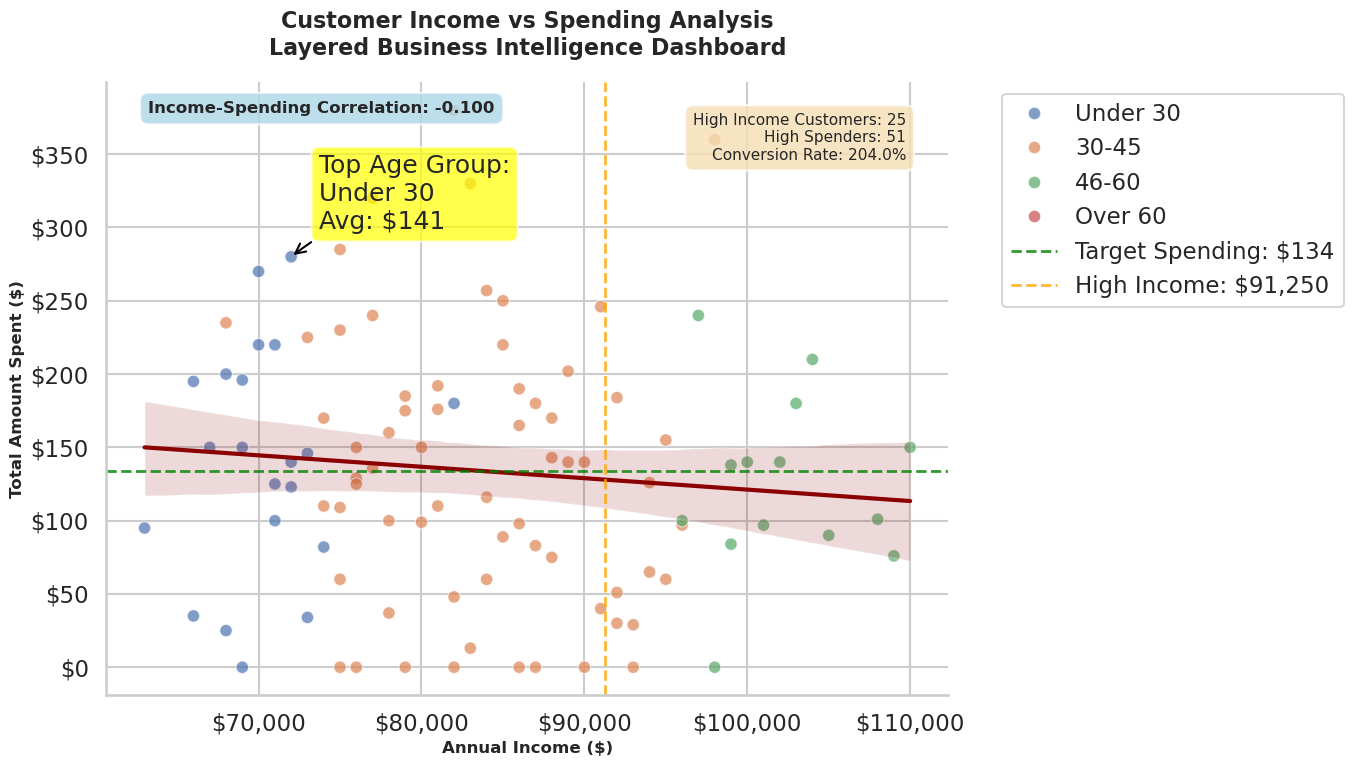

In [17]:

# =============================================================================
# STEP 2: Create Advanced Layered Visualization Canvas
# =============================================================================

print("\n🎨 Setting up advanced visualization canvas...")

# TODO: Create a larger figure to accommodate multiple layers
# Hint: fig, ax = plt.subplots(figsize=(14, 8))

fig, ax = plt.subplots(figsize=(14, 8))


# =============================================================================
# LAYER 1: Foundation Scatter Plot with Categorical Color Coding
# =============================================================================
# BUSINESS QUESTION: How does income relate to spending across different age groups?
# CHART TYPE: Scatter plot with categorical coloring
# 
# This layer shows individual customers as points, colored by age group
# to reveal both the income-spending relationship and age-based patterns

print("📍 Adding Layer 1: Customer scatter plot with age group colors...")

# TODO: Create a scatter plot showing income vs total spending, colored by age group
# Hint: Use sns.scatterplot() with these parameters:
# - data=customer_analysis
# - x='income' (customer annual income)
# - y='total_spent' (total amount they've spent)
# - hue='age_group' (color code by age categories)
# - alpha=0.7 (slight transparency for overlapping points)
# - s=80 (larger points for better visibility)
# - ax=ax

# LAYER 1: Scatter plot with age group coloring
sns.scatterplot(
    data=customer_analysis,
    x='income',
    y='total_spent',
    hue='age_group',
    alpha=0.7,
    s=80,
    ax=ax
)

# =============================================================================
# LAYER 2: Statistical Trend Line
# =============================================================================
# PURPOSE: Show overall income-spending relationship across all age groups
# CHART TYPE: Regression line with confidence interval
#
# This layer reveals the general trend while the confidence interval
# shows how reliable this relationship is

print("📈 Adding Layer 2: Overall trend line...")

# TODO: Add a regression line showing the overall income-spending relationship
# Hint: Use sns.regplot() with these parameters:
# - data=customer_analysis
# - x='income'
# - y='total_spent'
# - scatter=False (only show the line, not points)
# - color='darkred' (make it stand out from the colored points)
# - line_kws={'linewidth': 3} (thicker line for visibility)
# - ax=ax

# LAYER 2: Regression trend line
sns.regplot(
    data=customer_analysis,
    x='income',
    y='total_spent',
    scatter=False,
    color='darkred',
    line_kws={'linewidth': 3},
    ax=ax
)


# =============================================================================
# LAYER 3: Business Target Reference Lines
# =============================================================================
# PURPOSE: Add business context with target/threshold lines
# ELEMENT TYPE: Horizontal and vertical reference lines
#
# These lines help interpret the data in business terms

print("🎯 Adding Layer 3: Business reference lines...")

# TODO: Add horizontal line for target spending threshold
# Hint: Calculate a target spending amount (e.g., average spending)
# target_spending = customer_analysis['total_spent'].mean()
# ax.axhline(target_spending, color='green', linestyle='--', linewidth=2, alpha=0.8, label=f'Target Spending: ${target_spending:.0f}')

# LAYER 3: Business reference lines
target_spending = customer_analysis['total_spent'].mean()
high_income_threshold = customer_analysis['income'].quantile(0.75)

ax.axhline(
    target_spending,
    color='green',
    linestyle='--',
    linewidth=2,
    alpha=0.8,
    label=f'Target Spending: ${target_spending:.0f}'
)

# TODO: Add vertical line for high-income threshold
# Hint: Calculate high-income threshold (e.g., 75th percentile)
# high_income_threshold = customer_analysis['income'].quantile(0.75)
# ax.axvline(high_income_threshold, color='orange', linestyle='--', linewidth=2, alpha=0.8, label=f'High Income: ${high_income_threshold:,.0f}')

ax.axvline(
    high_income_threshold,
    color='orange',
    linestyle='--',
    linewidth=2,
    alpha=0.8,
    label=f'High Income: ${high_income_threshold:,.0f}'
)


# =============================================================================
# LAYER 4: Statistical Annotations
# =============================================================================
# PURPOSE: Provide quantitative insights and business intelligence
# ELEMENT TYPE: Multiple text annotations with business context
#
# These annotations tell the story and provide actionable insights

print("📊 Adding Layer 4: Business intelligence annotations...")

# TODO: Calculate correlation between income and spending
# correlation = customer_analysis['income'].corr(customer_analysis['total_spent'])

# LAYER 4: Statistical annotations
correlation = customer_analysis['income'].corr(customer_analysis['total_spent'])


# TODO: Calculate key business metrics
# high_income_customers = len(customer_analysis[customer_analysis['income'] > high_income_threshold])
# high_spenders = len(customer_analysis[customer_analysis['total_spent'] > target_spending])

high_income_customers = len(customer_analysis[customer_analysis['income'] > high_income_threshold])
high_spenders = len(customer_analysis[customer_analysis['total_spent'] > target_spending])


# TODO: Add correlation annotation in top-left
# Hint: ax.text(0.05, 0.95, f'Income-Spending Correlation: {correlation:.3f}', 
#              transform=ax.transAxes, fontsize=12, fontweight='bold',
#              bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.8))

ax.text(
    0.05, 0.95,
    f'Income-Spending Correlation: {correlation:.3f}',
    transform=ax.transAxes,
    fontsize=12,
    fontweight='bold',
    bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.8)
)


# TODO: Add business insights annotation in top-right
# Hint: insight_text = f'High Income Customers: {high_income_customers}\nHigh Spenders: {high_spenders}\nConversion Rate: {(high_spenders/high_income_customers)*100:.1f}%'
# ax.text(0.95, 0.95, insight_text, transform=ax.transAxes, fontsize=11,
#        bbox=dict(boxstyle="round,pad=0.5", facecolor='wheat', alpha=0.8),
#        verticalalignment='top', horizontalalignment='right')

insight_text = (
    f'High Income Customers: {high_income_customers}\n'
    f'High Spenders: {high_spenders}\n'
    f'Conversion Rate: {(high_spenders / high_income_customers) * 100:.1f}%'
)

ax.text(
    0.95, 0.95,
    insight_text,
    transform=ax.transAxes,
    fontsize=11,
    bbox=dict(boxstyle="round,pad=0.5", facecolor='wheat', alpha=0.8),
    verticalalignment='top',
    horizontalalignment='right'
)


# =============================================================================
# LAYER 5: Age Group Performance Callouts
# =============================================================================
# PURPOSE: Highlight specific insights about different age groups
# ELEMENT TYPE: Targeted annotations with arrows

print("👥 Adding Layer 5: Age group insights...")

# TODO: Calculate average spending by age group
# age_group_avg = customer_analysis.groupby('age_group')['total_spent'].mean()
# top_age_group = age_group_avg.idxmax()
# top_avg_spending = age_group_avg.max()

# LAYER 5: Age group performance callout
age_group_avg = customer_analysis.groupby('age_group', observed=True)['total_spent'].mean()
top_age_group = age_group_avg.idxmax()
top_avg_spending = age_group_avg.max()


# TODO: Add callout for top-performing age group
# Hint: Find a customer from the top age group to annotate
# top_customer = customer_analysis[customer_analysis['age_group'] == top_age_group].nlargest(1, 'total_spent')
# if not top_customer.empty:
#     ax.annotate(f'Top Age Group:\n{top_age_group}\nAvg: ${top_avg_spending:.0f}',
#                xy=(top_customer['income'].iloc[0], top_customer['total_spent'].iloc[0]),
#                xytext=(20, 20), textcoords='offset points',
#                bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
#                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1', color='black'))


top_customer = customer_analysis[customer_analysis['age_group'] == top_age_group].nlargest(1, 'total_spent')
if not top_customer.empty:
    ax.annotate(
        f'Top Age Group:\n{top_age_group}\nAvg: ${top_avg_spending:.0f}',
        xy=(top_customer['income'].iloc[0], top_customer['total_spent'].iloc[0]),
        xytext=(20, 20),
        textcoords='offset points',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1', color='black')
    )



# =============================================================================
# STEP 12: Professional Styling and Layout
# =============================================================================

print("✨ Adding professional styling...")

# TODO: Add comprehensive title
# Hint: ax.set_title('Customer Income vs Spending Analysis\nLayered Business Intelligence Dashboard', 
#                   fontsize=16, fontweight='bold', pad=20)

# Final styling
ax.set_title(
    'Customer Income vs Spending Analysis\nLayered Business Intelligence Dashboard',
    fontsize=16,
    fontweight='bold',
    pad=20
)

# TODO: Add clear axis labels with business context
# Hint: ax.set_xlabel('Annual Income ($)', fontsize=12, fontweight='bold')
#       ax.set_ylabel('Total Amount Spent ($)', fontsize=12, fontweight='bold')

ax.set_xlabel('Annual Income ($)', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Amount Spent ($)', fontsize=12, fontweight='bold')



# TODO: Add legend for age groups and reference lines
# Hint: ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# TODO: Format axis to show currency
# Hint: ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
#       ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# TODO: Apply layout and display
# Hint: plt.tight_layout()
#       plt.show()

plt.tight_layout()
plt.show()
